In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

2024-02-12 11:03:38.853128: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train = x_train.reshape(60000, 784).astype('float32') / 255
x_test = x_test.reshape(10000, 784).astype('float32') / 255


In [4]:
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [5]:
model = keras.Sequential([
    keras.layers.InputLayer(input_shape=(784,)),
    keras.layers.Dense(2000, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])


In [6]:
model.compile( loss='categorical_crossentropy', metrics=['accuracy'])

In [7]:
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.1)

Epoch 1/10
1688/1688 [==============================] - 20s 12ms/step - loss: 0.1922 - accuracy: 0.9412 - val_loss: 0.0843 - val_accuracy: 0.9763
Epoch 2/10
1688/1688 [==============================] - 19s 11ms/step - loss: 0.0815 - accuracy: 0.9754 - val_loss: 0.0943 - val_accuracy: 0.9753
Epoch 3/10
1688/1688 [==============================] - 19s 11ms/step - loss: 0.0535 - accuracy: 0.9839 - val_loss: 0.0808 - val_accuracy: 0.9812
Epoch 4/10
1688/1688 [==============================] - 18s 11ms/step - loss: 0.0393 - accuracy: 0.9884 - val_loss: 0.0837 - val_accuracy: 0.9798
Epoch 5/10
1688/1688 [==============================] - 18s 11ms/step - loss: 0.0269 - accuracy: 0.9915 - val_loss: 0.0835 - val_accuracy: 0.9835
Epoch 6/10
1688/1688 [==============================] - 18s 11ms/step - loss: 0.0195 - accuracy: 0.9939 - val_loss: 0.0934 - val_accuracy: 0.9817
Epoch 7/10
1688/1688 [==============================] - 19s 11ms/step - loss: 0.0136 - accuracy: 0.9957 - val_loss: 0.1109 -

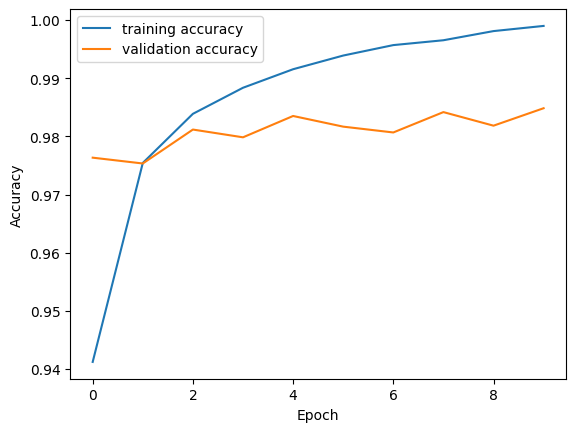

In [8]:
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [9]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print('Test accuracy:', test_acc)


313/313 - 1s - loss: 0.0730 - accuracy: 0.9849 - 775ms/epoch - 2ms/step
Test accuracy: 0.9848999977111816


313/313 [==============================] - 1s 3ms/step


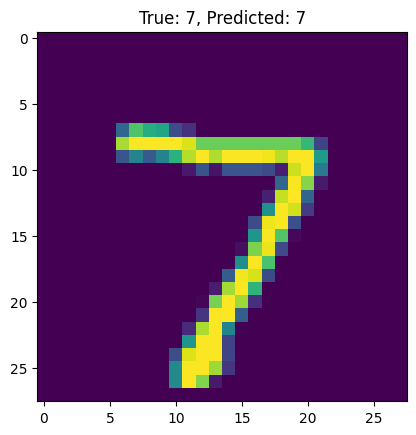

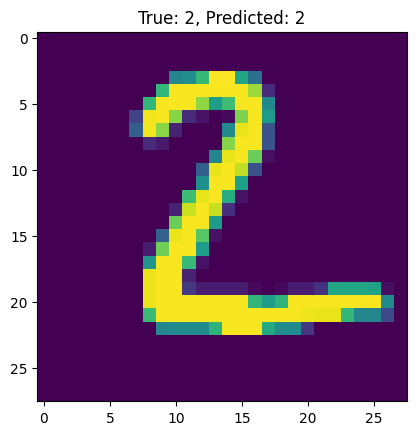

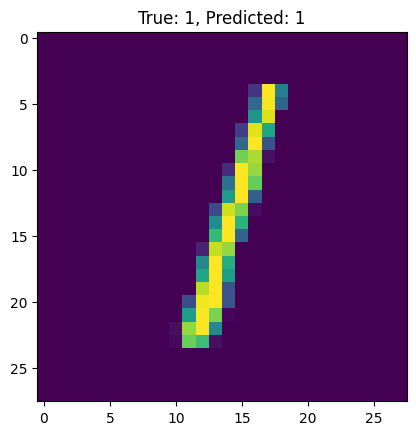

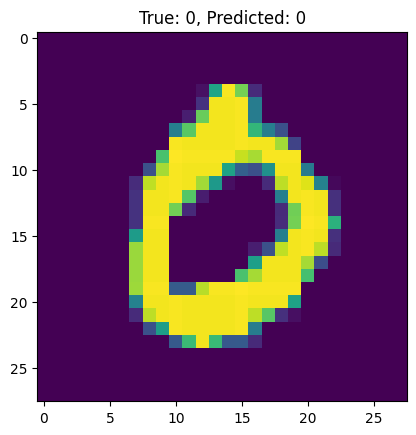

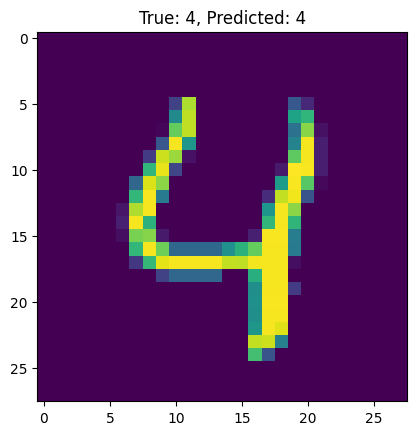

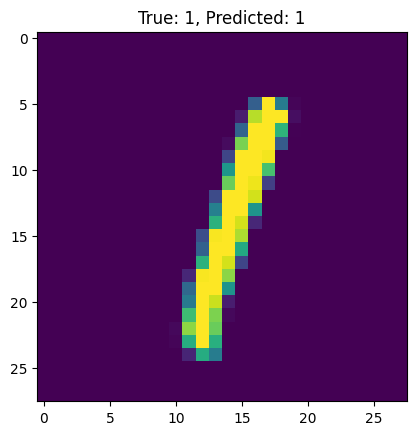

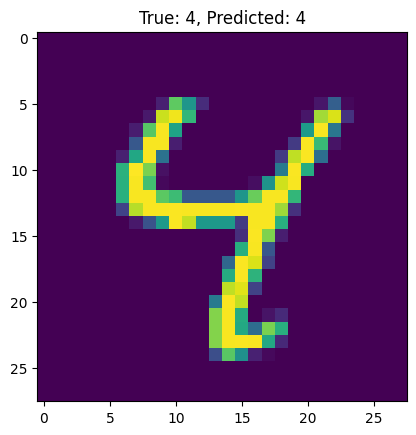

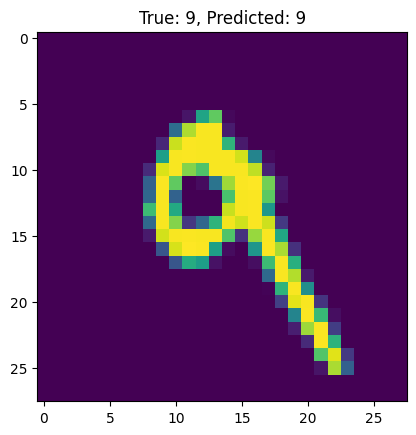

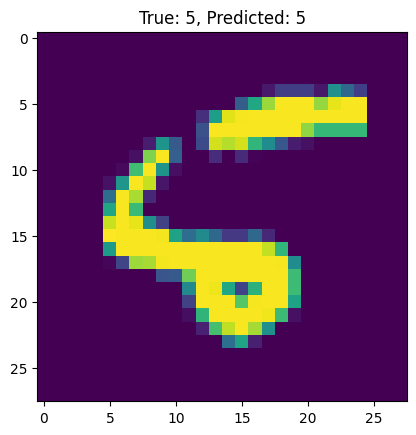

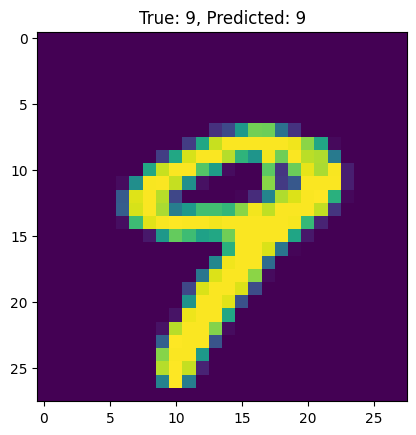

In [10]:
predictions = model.predict(x_test)

for i in range(10):
    plt.imshow(x_test[i].reshape(28, 28))
    plt.title(f"True: {np.argmax(y_test[[i]])}, Predicted: {np.argmax(predictions[i])}")
    plt.show()


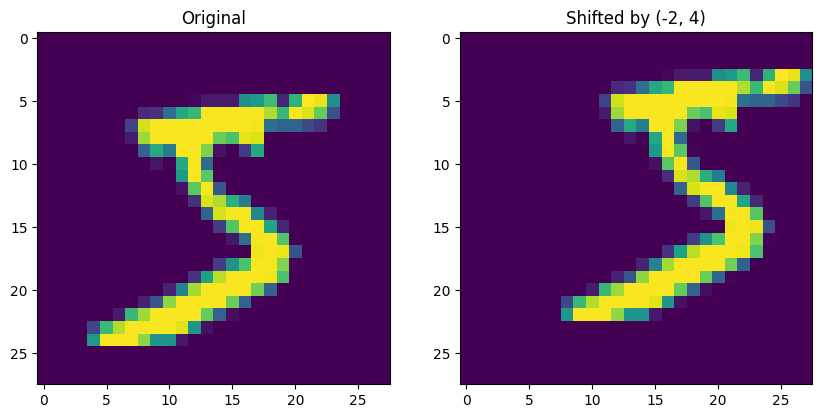

In [11]:

from keras.datasets import mnist

# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Select an image from the training set
image = train_images[0]

# Define the maximum amount of shift in pixels
max_shift = 10

# Generate random shift amounts for the row and column directions
row_shift = np.random.randint(-max_shift, max_shift + 1)
col_shift = np.random.randint(-max_shift, max_shift + 1)

# Initialize a new 28x28 image with all zeros
new_image = np.zeros((28, 28))

# Calculate the row and column indices for the original image and the new image
orig_row_start = max(-row_shift, 0)
orig_row_end = min(image.shape[0], 28 - row_shift)
new_row_start = max(row_shift, 0)
new_row_end = min(28, image.shape[0] + row_shift)

orig_col_start = max(-col_shift, 0)
orig_col_end = min(image.shape[1], 28 - col_shift)
new_col_start = max(col_shift, 0)
new_col_end = min(28, image.shape[1] + col_shift)

# Copy the original image to the new image with the appropriate shift
new_image[new_row_start:new_row_end, new_col_start:new_col_end] = image[orig_row_start:orig_row_end, orig_col_start:orig_col_end]

# Display the original and shifted images
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(image)
axs[0].set_title('Original')
axs[1].imshow(new_image)
axs[1].set_title(f'Shifted by ({row_shift}, {col_shift})')
plt.show()



1/1 [==============================] - 0s 28ms/step


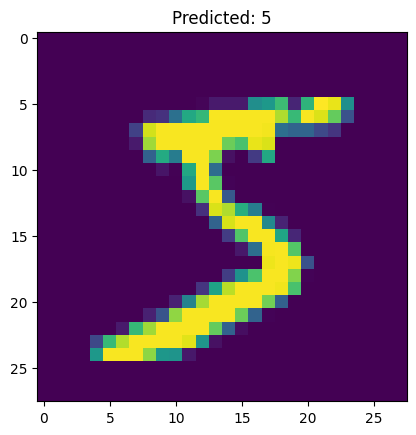

In [12]:
predictions1 = model.predict(image.reshape(1, 784).astype('float32') / 255)
plt.imshow(image)
plt.title( f"Predicted: {np.argmax(predictions1)}")
plt.show()


1/1 [==============================] - 0s 29ms/step


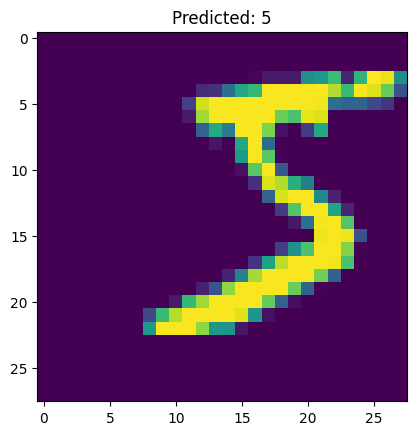

In [13]:
predictions1 = model.predict(new_image.reshape(1, 784).astype('float32') / 255)
plt.imshow(new_image)
plt.title( f"Predicted: {np.argmax(predictions1)}")
plt.show()
